In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# ToDo 1 Load the data set

In [2]:
df =  pd.read_csv("iplauction2023.csv")
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [3]:
#  ToDo 2 Understand the structure of the data
    

In [4]:
# differents attribute of the dataset:
#     name: name of the player
#     player style: the playing style or role of the player
#     nationality: The nationality of the player
#     3. base price(in lacs): represent the initial price set for the player in the auction
#     4. final price(in lacs): Represent the price at whice the player was sold
#     5. franchise: This attribute specifies the team or franchise tha perchased the player
#     6. status: Indicate the player's status in the auctionm, suct as "sold" or "unsold"    
        
        
        
    

In [5]:
df.info

<bound method DataFrame.info of                 name player style   nationality  base price (in lacs)  \
0       Harshit Rana       Bowler         India                   NaN   
1          Ekant Sen       Batter         India                  20.0   
2      Wayne Parnell   Allrounder  South Africa                  75.0   
3    Shakib Al Hasan   Allrounder    Bangladesh                 150.0   
4           Joe Root       Batter       England                 100.0   
..               ...          ...           ...                   ...   
304         MS Dhoni    WK-Batter         India                   NaN   
305        Moeen Ali   Allrounder       England                   NaN   
306  Ruturaj Gaikwad       Batter         India                   NaN   
307     Rishabh Pant    WK-Batter         India                   NaN   
308       Axar Patel   Allrounder         India                   NaN   

     final price (in lacs) franchise    status  
0                     20.0       KKR  RETA

In [6]:
 df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


# ToDo 3 : Handle the Missing Value

In [8]:
# CHeck for the missing value
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [9]:
len(df)

309

In [10]:
# here first of all a new df base_price is created based on the base price (in lacs) column of the df
base_price = df["base price (in lacs)"]
# Here the base price is in lacs
base_price.head()

0      NaN
1     20.0
2     75.0
3    150.0
4    100.0
Name: base price (in lacs), dtype: float64

In [11]:
base_price.isnull().sum()

158

In [12]:
base_price_without_null = base_price.fillna(base_price.mean())
base_price_without_null.head()

0     59.205298
1     20.000000
2     75.000000
3    150.000000
4    100.000000
Name: base price (in lacs), dtype: float64

In [17]:
base_price_without_null.isnull().sum()

0

In [21]:

# Remove the base price (in lacs) column from the df
df1 = df.drop(columns=['base price (in lacs)'])

In [15]:
# nicely i have removed the null value from the base price dataframe and filled with the mean value of the that colum
# For simplicity I would like to rename the base_price_without_null to BasePrice

In [19]:
BasePrice = base_price_without_null
BasePrice



0       59.205298
1       20.000000
2       75.000000
3      150.000000
4      100.000000
          ...    
304     59.205298
305     59.205298
306     59.205298
307     59.205298
308     59.205298
Name: base price (in lacs), Length: 309, dtype: float64

In [22]:
# Now I would like to add the BasePrice dataframe to my dataframe df and remove the previous base price column
# result = pd.concat([df, BasePrice], axis=1, join='inner')  # Options for 'join' are 'inner', 'outer'
# # print(result)
 
    
df2 = pd.concat([df1, BasePrice], axis=1, join="inner")
df2.head()

,name,player style,nationality,final price (in lacs),franchise,status,base price (in lacs)
0,Harshit Rana,Bowler,India,20.0,KKR,RETAINED,59.205298
1,Ekant Sen,Batter,India,NaN,NaN,UNSOLD,20.000000
2,Wayne Parnell,Allrounder,South Africa,NaN,NaN,UNSOLD,75.000000
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,KKR,SOLD,150.000000
4,Joe Root,Batter,England,100.0,RR,SOLD,100.000000


Fnially I have removed the base price(in lacs) column and added the same column replacing the null 
value with the mean on the column.
But here is a problem wtih adding the mean value because all the player have not the same base price.
For the very first time  I'm not considering this issue



In [35]:
# In the same way I will do this for final price

final_price = df["final price (in lacs)"]

# final_price.head()
 
FinalPrice = final_price.fillna(final_price.mean())
FinalPrice.head()
FinalPrice.isnull().sum()

0

In [36]:
# remove the final price from df2
df3 = df2.drop(columns=["final price (in lacs)"])

In [41]:
# Add FinalPrice with df3
# df2 = pd.concat([df1, BasePrice], axis=1, join="inner")
df4 = pd.concat([df3, FinalPrice], axis=1, join="inner")
df4.head()
 
 

,name,player style,nationality,franchise,status,base price (in lacs),final price (in lacs)
0,Harshit Rana,Bowler,India,KKR,RETAINED,59.205298,20.000000
1,Ekant Sen,Batter,India,NaN,UNSOLD,20.000000,368.067227
2,Wayne Parnell,Allrounder,South Africa,NaN,UNSOLD,75.000000,368.067227
3,Shakib Al Hasan,Allrounder,Bangladesh,KKR,SOLD,150.000000,150.000000
4,Joe Root,Batter,England,RR,SOLD,100.000000,100.000000


In [42]:
 df4.isnull().sum()

name                      0
player style              0
nationality               0
franchise                71
status                    0
base price (in lacs)      0
final price (in lacs)     0
dtype: int64

In [43]:
len(df4)
 

309

In [44]:
# Remove the row with null value
# Here df4 have only null value in the franchise column
# And if i delete them it will have a minor impact in the total data
df5 = df4.dropna()
len(df5)



# Now df5 have not any null value! that's great!

238

 # ToDo 4. Univariate analysis

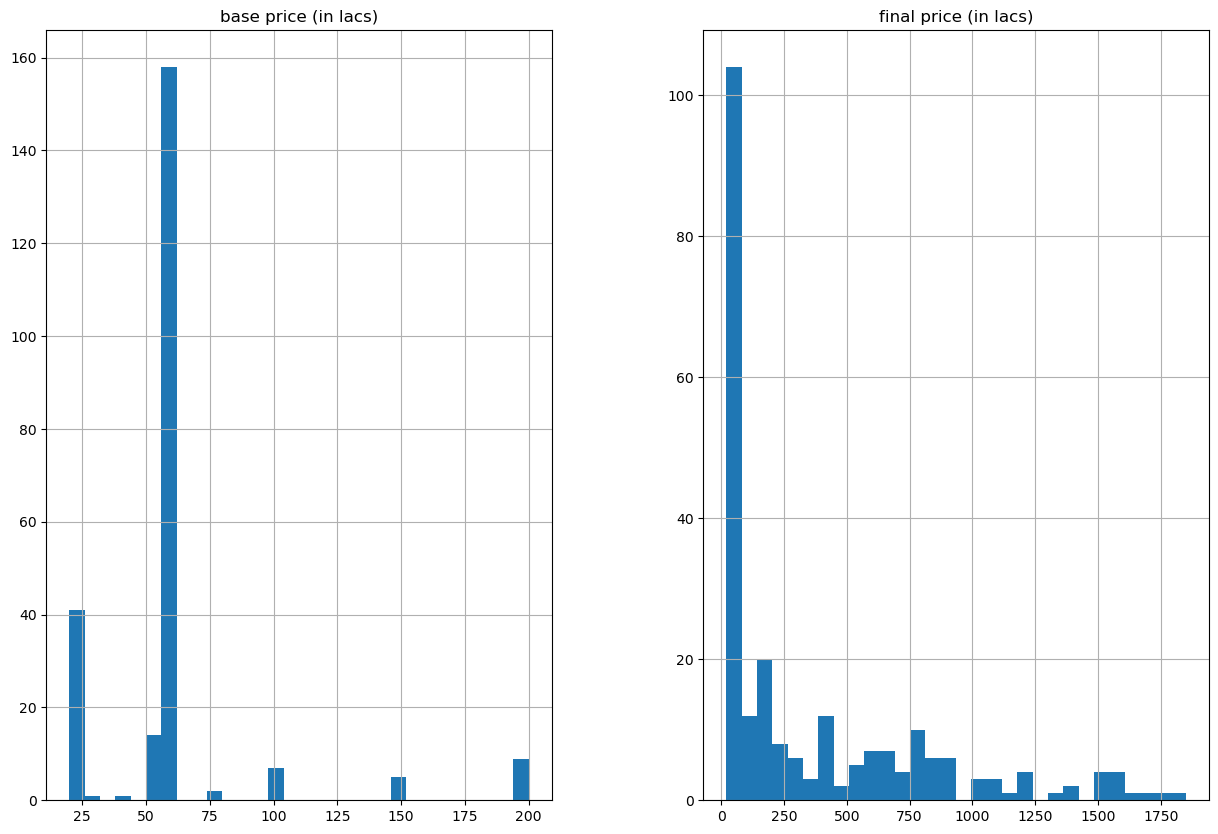

In [47]:
df5.hist(bins=30, figsize=(15, 10))
plt.show()

# Converting Categorical data into number
for training of the machine learnig model


In [52]:
  df5.head()

,name,player style,nationality,franchise,status,base price (in lacs),final price (in lacs)
0,Harshit Rana,Bowler,India,KKR,RETAINED,59.205298,20.0
3,Shakib Al Hasan,Allrounder,Bangladesh,KKR,SOLD,150.000000,150.0
4,Joe Root,Batter,England,RR,SOLD,100.000000,100.0
5,Abdul Basith,Allrounder,India,RR,SOLD,20.000000,20.0
7,Akeal Hosein,Bowler,West Indies,SRH,SOLD,100.000000,100.0


In [56]:
#   dummies = pd.get_dummies(df.town

dummies_playerStyle = pd.get_dummies(df5["player style"])
dummies_playerStyle

,Allrounder,Batter,Bowler,WK-Batter
0,0,0,1,0
3,1,0,0,0
4,0,1,0,0
5,1,0,0,0
7,0,0,1,0
...,...,...,...,...
304,0,0,0,1
305,1,0,0,0
306,0,1,0,0
307,0,0,0,1


In [ ]:
 Add this dummies_playerStyle with the df5

In [59]:
# merged = pd.concat([df,dummies],axis='columns')
df6 = pd.concat([df5, dummies_playerStyle], axis =1)
df6.head()

,name,player style,nationality,franchise,status,base price (in lacs),final price (in lacs),Allrounder,Batter,Bowler,WK-Batter
0,Harshit Rana,Bowler,India,KKR,RETAINED,59.205298,20.0,0,0,1,0
3,Shakib Al Hasan,Allrounder,Bangladesh,KKR,SOLD,150.000000,150.0,1,0,0,0
4,Joe Root,Batter,England,RR,SOLD,100.000000,100.0,0,1,0,0
5,Abdul Basith,Allrounder,India,RR,SOLD,20.000000,20.0,1,0,0,0
7,Akeal Hosein,Bowler,West Indies,SRH,SOLD,100.000000,100.0,0,0,1,0


In [63]:
 
df7 = df6.drop(["player style"], axis=1)
df7.head()

,name,nationality,franchise,status,base price (in lacs),final price (in lacs),Allrounder,Batter,Bowler,WK-Batter
0,Harshit Rana,India,KKR,RETAINED,59.205298,20.0,0,0,1,0
3,Shakib Al Hasan,Bangladesh,KKR,SOLD,150.000000,150.0,1,0,0,0
4,Joe Root,England,RR,SOLD,100.000000,100.0,0,1,0,0
5,Abdul Basith,India,RR,SOLD,20.000000,20.0,1,0,0,0
7,Akeal Hosein,West Indies,SRH,SOLD,100.000000,100.0,0,0,1,0


In [65]:
# Now do the same thing for status colulmn
dummies_status = pd.get_dummies(df7.status)
dummies_status 

,RETAINED,SOLD
0,1,0
3,0,1
4,0,1
5,0,1
7,0,1
...,...,...
304,1,0
305,1,0
306,1,0
307,1,0


In [66]:
df8 = pd.concat([df7, dummies_status], axis=1)
 
df8.head()


,name,nationality,franchise,status,base price (in lacs),final price (in lacs),Allrounder,Batter,Bowler,WK-Batter,RETAINED,SOLD
0,Harshit Rana,India,KKR,RETAINED,59.205298,20.0,0,0,1,0,1,0
3,Shakib Al Hasan,Bangladesh,KKR,SOLD,150.000000,150.0,1,0,0,0,0,1
4,Joe Root,England,RR,SOLD,100.000000,100.0,0,1,0,0,0,1
5,Abdul Basith,India,RR,SOLD,20.000000,20.0,1,0,0,0,0,1
7,Akeal Hosein,West Indies,SRH,SOLD,100.000000,100.0,0,0,1,0,0,1


In [71]:
df9 = df8.drop(['status'], axis=1) 
df9.head()

,name,nationality,franchise,base price (in lacs),final price (in lacs),Allrounder,Batter,Bowler,WK-Batter,RETAINED,SOLD
0,Harshit Rana,India,KKR,59.205298,20.0,0,0,1,0,1,0
3,Shakib Al Hasan,Bangladesh,KKR,150.000000,150.0,1,0,0,0,0,1
4,Joe Root,England,RR,100.000000,100.0,0,1,0,0,0,1
5,Abdul Basith,India,RR,20.000000,20.0,1,0,0,0,0,1
7,Akeal Hosein,West Indies,SRH,100.000000,100.0,0,0,1,0,0,1


In [ ]:
# The remaining cata data in nationality and franchise are not necessary for training the  model
# that's all

# Well done!!! shafin